In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')
data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [20]:
# Load training labels
data_label = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')
data_label

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


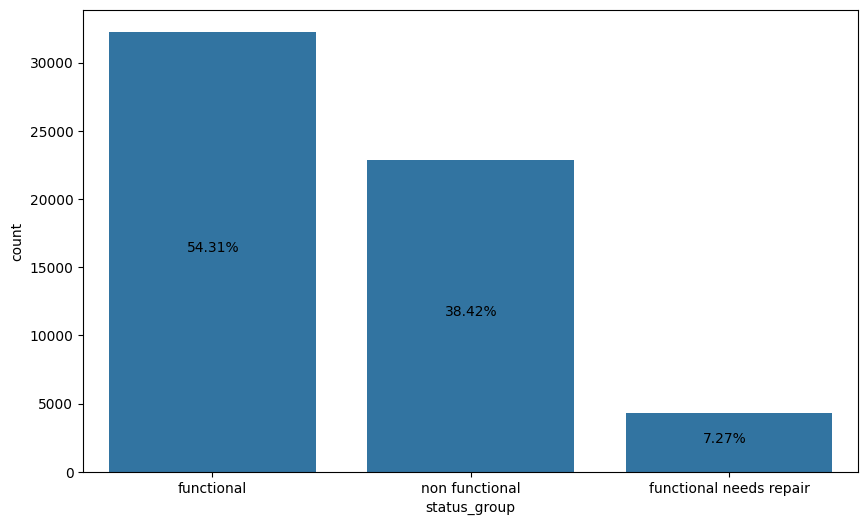

In [21]:
#plot the target variable to view
plt.subplots(figsize=(10,6))
ax = sns.countplot(x=data_label['status_group'])
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()*100/len(data_label)), (p.get_x()+0.3, p.get_height()*0.5))

In [22]:
# Merge labels with main data for ease in subsequent data clearning & transformation processes
data = data.merge(data_label, how='inner', on='id')
data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [24]:
data.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1896
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37399
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           11
scheme_name               2695
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [25]:
# Identify columns with missing values
missing_values = data.isnull().sum()
print(missing_values)

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [26]:
data.isnull().sum()/len(data)*100

id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.122896
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.003367
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.528620
scheme_name              48.501684
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

In [27]:
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_9208\4116619172.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(data[col].mode()[0])


In [28]:
data.isnull().sum()/len(data)*100

id                       0.0
amount_tsh               0.0
date_recorded            0.0
funder                   0.0
gps_height               0.0
installer                0.0
longitude                0.0
latitude                 0.0
wpt_name                 0.0
num_private              0.0
basin                    0.0
subvillage               0.0
region                   0.0
region_code              0.0
district_code            0.0
lga                      0.0
ward                     0.0
population               0.0
public_meeting           0.0
recorded_by              0.0
scheme_management        0.0
scheme_name              0.0
permit                   0.0
construction_year        0.0
extraction_type          0.0
extraction_type_group    0.0
extraction_type_class    0.0
management               0.0
management_group         0.0
payment                  0.0
payment_type             0.0
water_quality            0.0
quality_group            0.0
quantity                 0.0
quantity_group

In [29]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,59400.0,NaN,NaN,NaN,37115.131768,21453.128371,0.0,18519.75,37061.5,55656.5,74247.0
amount_tsh,59400.0,NaN,NaN,NaN,317.650385,2997.574558,0.0,0.0,0.0,20.0,350000.0
date_recorded,59400,356,2011-03-15,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funder,59400,1896,Government Of Tanzania,12721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gps_height,59400.0,NaN,NaN,NaN,668.297239,693.11635,-90.0,0.0,369.0,1319.25,2770.0
installer,59400,2145,DWE,21057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,59400.0,NaN,NaN,NaN,34.077427,6.567432,0.0,33.090347,34.908743,37.178387,40.345193
latitude,59400.0,NaN,NaN,NaN,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-0.0
wpt_name,59400,37399,none,3565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_private,59400.0,NaN,NaN,NaN,0.474141,12.23623,0.0,0.0,0.0,0.0,1776.0


In [30]:
# Convert 'date_recorded' column to datetime object
data['date_recorded'] = pd.to_datetime(data['date_recorded'])

# Extract year, month, and day from 'date_recorded'
data['year_recorded'] = data['date_recorded'].dt.year
data['month_recorded'] = data['date_recorded'].dt.month
data['day_recorded'] = data['date_recorded'].dt.day


In [31]:
# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=categorical_cols)


In [34]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['gps_height', 'population']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [38]:
corrMatrix = data[['funder', 'gps_height', 'installer', 'basin', 'region', 'district_code', 
            'scheme_management', 'permit', 'extraction_type_class', 'management', 'payment', 'quality_group', 'quantity', 'source_type',
            'waterpoint_type', 'construction_year',  'population', 'status_group']].corr()
plt.subplots(figsize=(25,25))
sns.heatmap(corrMatrix, annot=True, fmt='.1g')
plt.title('Correlation of Features Matrix')
plt.show()

KeyError: "['funder', 'installer', 'scheme_management', 'permit'] not in index"